# Project: Investigate a Dataset - The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set used comes from "The Movie Database (TMDb)" and contains information collected on over 10,000 
movies over the last 50 years. The data set has information on the movie's title, cast, genres, user ratings, 
popularity, budget, revenue and more. The "budget" and "revenue" data also has corresponding "budget_adj" and "revenue_adj"
values that account for what the 2010 value of these numbers would be, counting for inflation. 

For this project, I wanted to focus on the questions of determining correlation between different attributes of a movie and its success.
- Does a higher budget correlate to higher popularity?
- What are correlating factors for movies that have the highest revenue? 

### Imports

In [57]:
# Import necessary python libraries

%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

Populating the interactive namespace from numpy and matplotlib


### Resources Used

I was able to find helpful information on Python, Pandas, Dataframes, MatPlotLib and more:
- https://www.springboard.com/blog/data-wrangling/
- https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=In%20order%20to%20check%20missing,null%20values%20in%20a%20series.
- https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
- https://pbpython.com/pandas_dtypes.html
- https://stackoverflow.com/questions/46091924/python-how-to-drop-a-row-whose-particular-column-is-empty-nan
- https://note.nkmk.me/en/python-pandas-set-index/
- https://stackoverflow.com/questions/50165953/python-dataframes-describing-a-single-column
- https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
- https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html
- https://datatofish.com/correlation-matrix-pandas/
- https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram

<a id='wrangling'></a>
## Data Wrangling

### Load Data
The first step is to load the data from the csv file. This is done with Pandas, and automatically converts the data into a
Pandas DataFrame.

In [58]:
# Load data with Pandas and print out the first five lines

movieList = pd.read_csv('tmdb-movies.csv')
movieList.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [59]:
#Check the number of rows in the full list

print('Total Number of Rows: ',len(movieList))

Total Number of Rows:  10866


In [60]:
# Use Pandas's "describe" function to see some basic statistics about the columns in the DataFrame

movieList.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [61]:
# Use Panda's "dtypes" function to see the current data types in the DataFrame

movieList.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

After looking at the data types that currently exist, as well as the first five rows of data, I can see the following issues that will need to be addressed:
- The "release_date" is an object. This will need to be converted to a datetime type. 
- The "cast", "keywords", "genres" and "production_companies" columns are strings separated by "|". This will need to be converted into Python lists in case I want to do anything with each separate value within the string.
- When trying to set the "id" field as the index, it would not work because there were duplicates. For this reason, I decided to use the column "imbd_id" as the index instead.  This will be set later in the notebook.

### Check for Missing Data

In [62]:
# Count the number of nulls for each column

null_values = movieList.columns[movieList.isnull().any()]
movieList[null_values].isnull().sum()

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

Based on the questions that I have decided to ask of the data, I need the following columns to not have null values: 
- imdb_id
- popularity
- budget_adj
- revenue_adj
- runtime
- release date

In [63]:
# Check for abnormalities with min

movieList.min()

id                       5
popularity         6.5e-05
budget                   0
revenue                  0
original_title    $5 a Day
runtime                  0
release_date        1/1/00
vote_count              10
vote_average           1.5
release_year          1960
budget_adj               0
revenue_adj              0
dtype: object

There appear to be multiple columns that do have values of 0, as opposed to null. I will need to deal with this when
cleaning up the data.

In [64]:
# Check for other abnormalities with max

movieList.max()

id                     417859
popularity            32.9858
budget              425000000
revenue            2781505847
original_title       í•˜ìš¸ë§
runtime                   900
release_date           9/9/97
vote_count               9767
vote_average              9.2
release_year             2015
budget_adj           4.25e+08
revenue_adj       2.82712e+09
dtype: object

There appears to be an issue with the characters in "original_title"; however, the requirements of the project have specified
that it is not necessary to handle these at this time. 

I've also noticed that the supposed max "release_date" is in 1997; however the max "release_year" is 2015. I will have to make
sure that this is fixed once I convert "release_date" into a datetime.

In [65]:
# Check for 0 values

zero_budget = movieList.loc[movieList['budget_adj'] == 0]
print('Records with Zero Budget: ', len(zero_budget))

zero_revenue = movieList.loc[movieList['revenue_adj'] == 0]
print('Records with Zero Revenue: ', len(zero_revenue))

zero_runtime = movieList.loc[movieList['runtime'] == 0]
print('Records with Zero Runtime: ', len(zero_runtime))



Records with Zero Budget:  5696
Records with Zero Revenue:  6016
Records with Zero Runtime:  31


There appear to be quite a lot of records that have a value of 0 for "budget" and "revenue". Since I am using these columns to 
answer certain questions, I will need to get rid of those 0 values. Luckily, there are only a small number of records that have a 0 value for "runtime"

### Fix Data Types

In [66]:
# Convert release_date to datetime and confirm data type

movieList['release_date'] = pd.to_datetime(movieList['release_date'])
    
print(movieList['release_date'].dtypes)

datetime64[ns]


In [67]:
# Add a new column to keep track of release month

movieList['release_month'] = pd.DatetimeIndex(movieList['release_date']).month
print(movieList['release_month'])

0         6
1         5
2         3
3        12
4         4
         ..
10861     6
10862    12
10863     1
10864    11
10865    11
Name: release_month, Length: 10866, dtype: int64


In [68]:
# Convert columns that have string values into lists

movieList['cast'] = movieList['cast'].str.split('|')
print(movieList['cast'])

0        [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1        [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2        [Shailene Woodley, Theo James, Kate Winslet, A...
3        [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4        [Vin Diesel, Paul Walker, Jason Statham, Miche...
                               ...                        
10861    [Michael Hynson, Robert August, Lord 'Tally Ho...
10862    [James Garner, Eva Marie Saint, Yves Montand, ...
10863    [Innokentiy Smoktunovskiy, Oleg Efremov, Georg...
10864    [Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...
10865    [Harold P. Warren, Tom Neyman, John Reynolds, ...
Name: cast, Length: 10866, dtype: object


In [69]:
movieList['keywords'] = movieList['keywords'].str.split('|')
print(movieList['keywords'])

0        [monster, dna, tyrannosaurus rex, velociraptor...
1        [future, chase, post-apocalyptic, dystopia, au...
2        [based on novel, revolution, dystopia, sequel,...
3              [android, spaceship, jedi, space opera, 3d]
4                [car race, speed, revenge, suspense, car]
                               ...                        
10861                         [surfer, surfboard, surfing]
10862                        [car race, racing, formula 1]
10863                         [car, trolley, stealing car]
10864                                              [spoof]
10865            [fire, gun, drive, sacrifice, flashlight]
Name: keywords, Length: 10866, dtype: object


In [70]:
movieList['genres'] = movieList['genres'].str.split('|')
print(movieList['genres'])

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10866, dtype: object


In [71]:
movieList['production_companies'] = movieList['production_companies'].str.split('|')
print(movieList['production_companies'])

0        [Universal Studios, Amblin Entertainment, Lege...
1        [Village Roadshow Pictures, Kennedy Miller Pro...
2        [Summit Entertainment, Mandeville Films, Red W...
3            [Lucasfilm, Truenorth Productions, Bad Robot]
4        [Universal Pictures, Original Film, Media Righ...
                               ...                        
10861                                  [Bruce Brown Films]
10862    [Cherokee Productions, Joel Productions, Dougl...
10863                                            [Mosfilm]
10864                            [Benedict Pictures Corp.]
10865                                          [Norm-Iris]
Name: production_companies, Length: 10866, dtype: object


In [72]:
# Check all datatypes after changes made. 

movieList.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
release_month                    int64
dtype: object

### Fix Missing Data


In [73]:
# Function to count total records and print value

def print_count(data):
    print('Total Records: ', len(data))

In [74]:
# Remove rows with missing imdb_id

movieList = movieList[movieList['imdb_id'].notnull()]
print_count(movieList)

Total Records:  10856


In [75]:
# Remove rows with 0 budget_adj

movieList = movieList[movieList.budget_adj != 0]
print_count(movieList)

Total Records:  5169


In [76]:
# Remove rows with 0 revenue_adj

movieList = movieList[movieList.revenue_adj != 0]
print_count(movieList)

Total Records:  3855


In [77]:
# Remove rows with 0 runtime

movieList = movieList[movieList.runtime != 0]
print_count(movieList)

Total Records:  3855


After removing all the appropriate 0 value columns, I'm left with a lot fewer rows; however, my calculated statistics
will be much more accurate.

In [78]:
# Re-check the minimum values for the entire list

movieList.min()

id                                                                5
imdb_id                                                   tt0053604
popularity                                                 0.001117
budget                                                            1
revenue                                                           2
original_title                                 (500) Days of Summer
overview          "88 Minutes" focuses on a college professor (P...
runtime                                                          15
genres                                                     [Action]
release_date                                    1970-01-24 00:00:00
vote_count                                                       10
vote_average                                                    2.2
release_year                                                   1960
budget_adj                                                 0.969398
revenue_adj                                     

There are now no values of 0, and my minimum "release_date" looks much better.

In [79]:
# Re-check the maximum values for the entire list

movieList.max()

id                                                           417859
imdb_id                                                   tt4337690
popularity                                                  32.9858
budget                                                    425000000
revenue                                                  2781505847
original_title                                ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
overview          Zoo animals leave the comforts of man-made hab...
runtime                                                         338
genres                                          [Western, Thriller]
release_date                                    2069-12-12 00:00:00
vote_count                                                     9767
vote_average                                                    8.4
release_year                                                   2015
budget_adj                                                 4.25e+08
revenue_adj                                     

I've noticed that the maximum "release_date" is actually set in the future. I will need to address this as well so that I
only include records with information from the past.

In [80]:
# Remove rows that have a release date in the future

movieList = movieList[movieList.release_date < dt.now()]
print_count(movieList)

Total Records:  3784


### Set Index

In [81]:
# Set the index to the "imdb_id" column instead and print out the first five records to confirm

movieList = movieList.set_index('imdb_id')
movieList.head()

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0369610,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
tt1392190,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,"[future, chase, post-apocalyptic, dystopia, au...",...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
tt2908446,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,"[based on novel, revolution, dystopia, sequel,...",...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
tt2488496,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,"[android, spaceship, jedi, space opera, 3d]",...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
tt2820852,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [82]:
# Test that id is working

movieList.loc['tt2488496']

id                                                                 140607
popularity                                                        11.1731
budget                                                          200000000
revenue                                                        2068178225
original_title                               Star Wars: The Force Awakens
cast                    [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
homepage                http://www.starwars.com/films/star-wars-episod...
director                                                      J.J. Abrams
tagline                                     Every generation has a story.
keywords                      [android, spaceship, jedi, space opera, 3d]
overview                Thirty years after defeating the Galactic Empi...
runtime                                                               136
genres                      [Action, Adventure, Science Fiction, Fantasy]
production_companies        [Lucasfilm

### Cleanup Done
The data is now cleaned up. I have removed null values and 0 values. I have adjusted data types and set a new index.
I am now ready to start exploring the data directly.

In [83]:
# Overview of general statistics for each numbered column

movieList.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,3784.000000,3784.000000,3.784000e+03,3.784000e+03,3784.000000,3784.000000,3784.000000,3784.000000,3.784000e+03,3.784000e+03,3784.000000
mean,40508.202167,1.195320,3.777900e+07,1.089113e+08,108.763214,532.996300,6.156158,2001.951903,4.424303e+07,1.343809e+08,7.024049
std,67676.711152,1.484215,4.237651e+07,1.778175e+08,19.325993,886.194038,0.792860,10.186722,4.487643e+07,2.126691e+08,3.362291
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1970.000000,9.693980e-01,2.370705e+00,1.000000
25%,6675.000000,0.463467,1.000000e+07,1.386258e+07,95.000000,72.000000,5.600000,1996.000000,1.298003e+07,1.792320e+07,4.000000
50%,11376.000000,0.799519,2.500000e+07,4.570828e+07,105.000000,206.000000,6.200000,2004.000000,3.002841e+07,6.032400e+07,7.000000
75%,39785.750000,1.374400,5.000000e+07,1.262249e+08,119.000000,583.250000,6.700000,2010.000000,6.076720e+07,1.599225e+08,10.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [84]:
# Use pandas "corr" function to see what columns correlate well with one another

correlation = movieList.corr(method="pearson")
correlation

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
id,1.000000,0.188943,-0.034451,-0.006696,-0.025509,0.109157,0.006844,0.515377,-0.125515,-0.084410,0.017440
popularity,0.188943,1.000000,0.448885,0.615949,0.231476,0.780303,0.322117,0.184613,0.404614,0.554573,0.032106
budget,-0.034451,0.448885,1.000000,0.688190,0.287131,0.556617,0.036158,0.251038,0.968461,0.558523,0.034475
revenue,-0.006696,0.615949,0.688190,1.000000,0.270304,0.754500,0.235721,0.129677,0.663147,0.923029,0.038681
runtime,-0.025509,0.231476,0.287131,0.270304,1.000000,0.295018,0.355994,-0.043957,0.329286,0.284636,0.172821
vote_count,0.109157,0.780303,0.556617,0.754500,0.295018,1.000000,0.395165,0.209729,0.503397,0.671935,0.015886
vote_average,0.006844,0.322117,0.036158,0.235721,0.355994,0.395165,1.000000,-0.097447,0.041574,0.264803,0.122153
release_year,0.515377,0.184613,0.251038,0.129677,-0.043957,0.209729,-0.097447,1.000000,0.083668,-0.073214,-0.065614
budget_adj,-0.125515,0.404614,0.968461,0.663147,0.329286,0.503397,0.041574,0.083668,1.000000,0.585109,0.059286
revenue_adj,-0.084410,0.554573,0.558523,0.923029,0.284636,0.671935,0.264803,-0.073214,0.585109,1.000000,0.054347


I've noticed the following high correlations:
- "budget_adj" with "budget"  This makes sense because the "budget_adj" column is derived directly from "budget".
- "revenue_adj" with "revenue"  This makes sense because the "revenue_adj" column is derived directly from "revenue".
- "revenue_adj" with "budget"  This value is somewhat high, and is one of the questions that I want to dig into more.

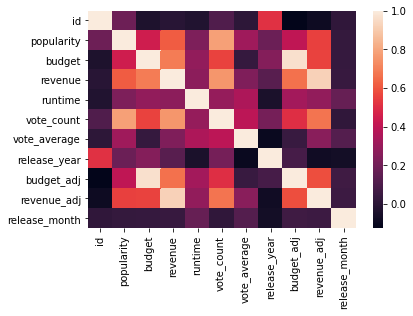

In [85]:
# Heatmap from Seaborn of correlation data from above

sns.heatmap(correlation, annot=False)
plt.show()

I removed the annotations in order to avoid clutter. The color values seem to be sufficient to help look for possible correlations.

### Does a Higher Budget Correlate to Higher Popularity?

In [86]:
# Function to calculate correlation

def correlate(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    print('Correlation: ',(std_x * std_y).mean())

In [87]:
# Test out function to make sure that it works properly

correlate(movieList['budget'], movieList['budget_adj'])

Correlation:  0.9684612836743883


I wanted to make sure that my function was working properly to calculate correlation. I tested this out with checking the correlation
between "budget" and "budget_adj", since, as mentioned before, the "budget_adj" value is derived from "budget".

In [88]:
# Calculate correlation with budget_adj and popularity

correlate(movieList['budget_adj'], movieList['popularity'])

Correlation:  0.4046142403197343


In [89]:
# Determine min and max values for budget_adj

min_budget = movieList['budget_adj'].min()
max_budget = movieList['budget_adj'].max()

print('Min Adjusted Budget: ', min_budget)
print('Max Adjusted Budget: ', max_budget)

Min Adjusted Budget:  0.9693980425914721
Max Adjusted Budget:  425000000.0


I used the min and max values for budget_adj to determine which buckets to create

In [90]:
# Create a bucketed version of budget_adj to use for comparison. 

def budget_bucket(data):
    bucket = None
    if data < 100000000:
        bucket = '0+'
    elif data < 200000000:
        bucket = '100M+'
    elif data < 300000000:
        bucket = '200M+'
    elif data < 400000000:
        bucket = '300M+'
    elif data < 500000000:
        bucket = '400M+'
    return bucket
        
movieList['budget_bucket'] = movieList['budget_adj'].apply(budget_bucket)

budget_bucket_means = movieList.groupby('budget_bucket')['revenue_adj'].mean()
print(budget_bucket_means)

budget_bucket
0+       9.868124e+07
100M+    3.896372e+08
200M+    7.707175e+08
300M+    1.000536e+09
400M+    1.108757e+07
Name: revenue_adj, dtype: float64


Text(0, 0.5, 'Mean of Popularity')

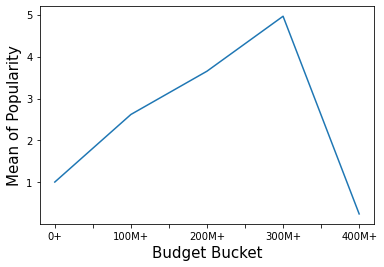

In [91]:
# Calculate mean popularity for each budget_bucket

budget_pop_means = movieList.groupby('budget_bucket')['popularity'].mean()

budget_pop_means.plot()
plt.xlabel("Budget Bucket", fontsize=15)
plt.ylabel("Mean of Popularity", fontsize=15)

While there is not a very high correlation of budget_adj with popularity, you can see a trend. It appears that high budget_adj
correlates with higher popularity up to a point. 

### What are Correlating Factors for Movies that Have the Highest Revenue?

In [92]:
# Calculate statistics about revenue

movieList['revenue_adj'].describe()

count    3.784000e+03
mean     1.343809e+08
std      2.126691e+08
min      2.370705e+00
25%      1.792320e+07
50%      6.032400e+07
75%      1.599225e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

Text(0, 0.5, 'Frequency')

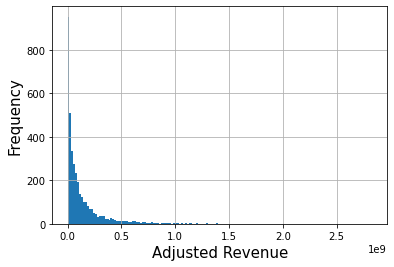

In [93]:
# Histogram of revenue_adj

movieList['revenue_adj'].hist(bins='auto')
plt.xlabel("Adjusted Revenue", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

The variance between revenue_adj values is quite high. Now I will be digging into some possible factors.

(1.0, 12.0)

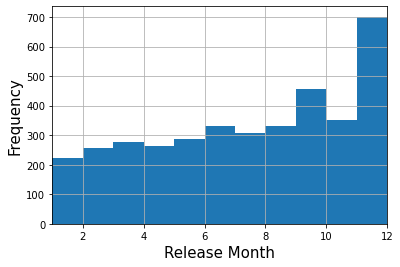

In [94]:
# Histogram of Release Months

movieList['release_month'].hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Release Month", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([1,12])

Using the new release_month column I created, I found that movies were released at all times during the year. There were
higher instances of releases in October and December; however, this does not tell us anything in and of itself.

Text(0, 0.5, 'Mean of Adjusted Revenue')

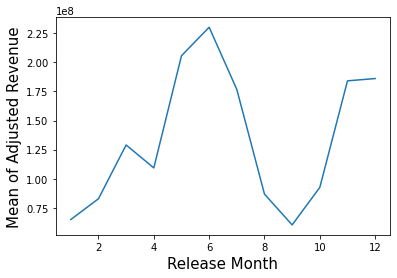

In [95]:
# Calculate mean revenue_adj for each release_month

monthMeans = movieList.groupby('release_month')['revenue_adj'].mean()

monthMeans.plot()
plt.xlabel("Release Month", fontsize=15)
plt.ylabel("Mean of Adjusted Revenue", fontsize=15)

I then took the release_month and found the mean of revenue_adj for each month. There do appear to be spikes in revenue
in the months of May/June/July and November/December. 

In [96]:
# Calculate correlation with budget_adj and revenue_adj

correlate(movieList['budget_adj'], movieList['revenue_adj'])

Correlation:  0.5851085454604296


There appears to be a slight correlation between a higher budget_adj and a higher revenue_adj. This is not enough to indicate causation though.

Text(0, 0.5, 'Frequency')

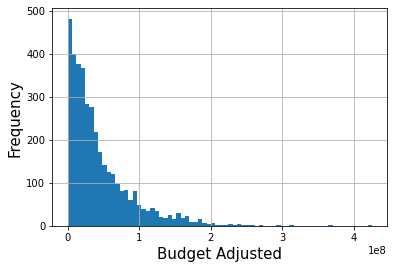

In [97]:
# Histogram of budgetj_adj

movieList['budget_adj'].hist(bins='auto')
plt.xlabel("Budget Adjusted", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

There are a lot of possibilities for budget_adj values. 

In [98]:
# Basic stats for budget_adj

movieList['budget_adj'].describe()

count    3.784000e+03
mean     4.424303e+07
std      4.487643e+07
min      9.693980e-01
25%      1.298003e+07
50%      3.002841e+07
75%      6.076720e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

Text(0, 0.5, 'Mean of Adjusted Revenue')

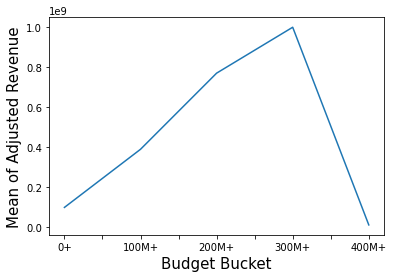

In [99]:
# Calculate mean revenue_adj for each budget_adj bucket

budget_rev_means = movieList.groupby('budget_bucket')['revenue_adj'].mean()

budget_rev_means.plot()
plt.xlabel("Budget Bucket", fontsize=15)
plt.ylabel("Mean of Adjusted Revenue", fontsize=15)

Similar to the results for popularity, it appears that a higher budget_adj correlates to a higher revenue_adj, up to a certain point. 

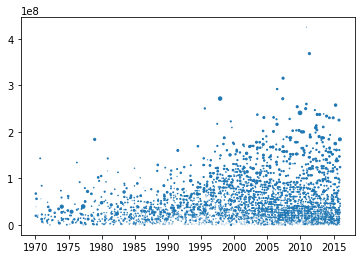

In [100]:
# Scatterplot to look at release date and budget impacting revenue

scaled_revenue = (movieList['revenue_adj'] / movieList['revenue_adj'].std())

plt.scatter(movieList.release_date, movieList.budget_adj, s=scaled_revenue)

I wanted to see how the combination of release_date and budget_adj contributed to revenue_adj. It appears that there are plenty
of higher revenue_adj values with every different combination. 

In [101]:
# Calculate correlation with runtime and revenue_adj

correlate(movieList['runtime'], movieList['revenue_adj'])

Correlation:  0.28463612283652895


There is not a strong argument for correlation between a higher runtime and higher revenue_adj.  I did not think that this
should be the case, but it's still interesting to look at. Now, I'd like to look at the possibility of correlation between the different runtime buckets and their impact on revenue_adj.

In [102]:
# Determine min and max values for runtime

min_runtime = movieList['runtime'].min()
max_runtime = movieList['runtime'].max()

print('Min Runtime: ', min_runtime)
print('Max Runtime: ', max_runtime)

Min Runtime:  15
Max Runtime:  338


I determined the min and max values for runtime in order to help determine what buckets to create.

In [103]:
# Create a bucketed version of runtime to use for comparison

def runtime_bucket(data):
    bucket = None
    if data < 60:
        bucket = '0h'
    elif data < 120:
        bucket = '1h+'
    elif data < 180:
        bucket = '2h+'
    elif data < 240:
        bucket = '3h+'
    elif data < 300:
        bucket = '4h+'
    elif data < 360:
        bucket = '5h+'
    return bucket
        
movieList['runtime_bucket'] = movieList['runtime'].apply(runtime_bucket)

runtime_bucket
0h     1.532519e+07
1h+    1.026661e+08
2h+    2.337939e+08
3h+    3.244638e+08
5h+    8.712790e+05
Name: revenue_adj, dtype: float64


Text(0, 0.5, 'Mean of Adjusted Revenue')

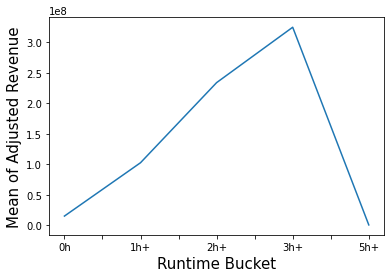

In [104]:
# Calculate mean revenue_adj for each runtime_bucket

runtime_bucket_means = movieList.groupby('runtime_bucket')['revenue_adj'].mean()
print(runtime_bucket_means)

runtime_bucket_means.plot()
plt.xlabel("Runtime Bucket", fontsize=15)
plt.ylabel("Mean of Adjusted Revenue", fontsize=15)

There is some correlation with higher runtimes and higher adjusted revenue, up to a point.

<a id='conclusions'></a>
## Conclusions

1. Does a Higher Budget Correlate to a Higher Popularity?
I do not feel that there is sufficient evidence to support this claim. There is some correlation that a higher budget led to a higher mean for adjusted revenue; however, this does not stay constant. 

2. What are Correlating Factors for Movies that Have the Highest Revenue?
There were some slight correlations with adjusted revenue and adjusted budget; however, this correlation did not remain constant. I cannot argue that there is causation here.
Runtime had a similar impact on adjusted revenue; a higher runtime seemed to correlate with a higher adjusted revenue up to a certain point, and then it seemed to have a negative impact instead.
Looking at the release month, there appeared to be spikes in the mean of adjusted revenue in the months of May/June/July and November/December. 
There did not seem to be any specific correlation between a mix of runtime and release month for adjusted revenue. There were inconsistent results all over.
I do not feel that I was able to determine statistical conclusions with the analysis I did. I cannot imply causation in any of the factors researched. 

There were some limitations with the analysis done. I had to remove over half of the original 10,000 records due to missing data. I recognized that there were outliers in some of the data points, but was unsure what was appropriate to filter out. 
For example, there were multiple records that had adjusted budgets below 1000. It felt like these results could have been inaccurate, and therefore could have skewed the findings. I did decide to leave these records in, and only took out records that had 0 values instead. 
I noticed that a lot of my plots had the same exact shape, and that caused me some concern; however, I checked and found that the values were all different from one another.


In [105]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255